## Как все начиналось
В 2008 году Сатоши Накамото статью «Биткойн: одноранговая электронная денежная система». В документе описаны некоторые криптографические методы децентрализованного перевода платежей и описана распределенная система хранения данных (теперь широко известная как «блокчейн»).

С тех пор блокчейн вызывает интерес практически во всех отраслях. Блокчейн теперь является базовой технологией, лежащей в основе полностью цифровых криптовалют, таких как Биткойн, технологий распределенных вычислений, таких как Ethereum, и фреймворков с открытым исходным кодом.

## Что такое "blockchain”?
Блокчейн - это способ хранения цифровых данных. Данные могут быть любыми, в случае с Bitcoin речь о транзакциях (т.е. логах переводов Bitcoin с одного аккаунта на другой), но на деле - это может быть что угодно, даже файлы (не имеет значения). 
Данные хранятся в блоках, которые связаны друг с другом с использованием хешей.

## Цифровой отпечаток пальца (HASH)
Хэш функция принимает на вход данные любого размера и обрабатывает их и возвращает короткую строчку фиксированного размера (цифровой отпечаток пальца).

In [179]:
import hashlib

In [25]:
book1 = b'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum'
book2 = b'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum'

In [47]:
def calc_hash(data):
    """Расчет hash-функции по аргументу frame"""
    hashId = hashlib.md5()
    hashId.update(repr(data).encode('utf-8'))
    return hashId.hexdigest()

In [48]:
print(calc_hash(book1))
print(calc_hash(book2))

ab2618cefb2922519e955f4692426b5d
ab2618cefb2922519e955f4692426b5d


## В чем магия?
Вся магия в том как данные хранятся и добавляются в Blockchain.
Блоки добавляются последовательно (т.е. имеют порядок), после добавления они не могут быть модифицированы (технология append only) и хранятся распределенно.
Это обеспечивает:
- отсутствие единой точки контроля
- отказоустойчивость
- гарантии порядка добавления данных

## Что такое Block?


In [178]:
block = {
    'index': 1,
    'timestamp': 1506057125.900785,
    'transactions': [
        {
            'sender': "8527147fe1f5426f9dd545de4b27ee00",
            'recipient': "a77f5cdfa2934df3954a5c7c7da5df1f",
            'amount': 5,
        },
        {
            'sender': "8527147fe1f542df9dd545de4b27ee01",
            'recipient': "a77f5cdfa29334df3954a5c7c7da5df1d",
            'amount': 10,
        }
    ],
    'nonce' : 12345,
    'previous_hash' : 'ab2618cefb2922519e955f4692426b5d'
    
}

## Соединение блоков в цепь
Со структурой блока разобрались. Теперь поймем как их соединить. 
Можно хранить блоки в python простым списком. Но это не очень корректно, т.к. остается возможность заменить старый блок.

Нам нужен способ убедиться, что любое изменение в предыдущих блоках делает недействительной всю цепочку. 

Способ сделать это в Blockchain - создать зависимость между последовательными блоками, связав их в цепочку с хешем блока, непосредственно предшествующего им. 

Хорошо, если каждый блок связан с предыдущим блоком через поле previous_hash, как насчет самого первого блока? Этот блок называется генезис-блоком, и его можно сгенерировать вручную. Давайте добавим поле previous_hash в класс Block и реализуем начальную структуру нашего класса Blockchain.

In [104]:
# Создадим генезис-блок
block0 = {
    'transactions' : [
        {
            'from' : 'Вася',
            'to'   : 'Петя',
            'amt'  : 10 
        },
        {
            'from' : 'Алеша',
            'to'   : 'Валера',
            'amt'  : 10 
        },
        {
            'from' : 'Митя',
            'to'   : 'Таня',
            'amt'  : 10 
        }
    ],
    'previous_hash': '0'
}

In [113]:
block1 = {
    'transactions' : [
        {
            'from' : 'A',
            'to'   : 'B',
            'amt'  : 100 
        },
        {
            'from' : 'B',
            'to'   : 'C',
            'amt'  : 10 
        },
        {
            'from' : 'C',
            'to'   : 'D',
            'amt'  : 10 
        }
    ],
     'previous_hash': calc_hash(block0)
}

In [106]:
print("\n Блок 0 \n" + str(block0))
print("\n Блок 1 \n" + str(block1))


 Блок 0 
{'transactions': [{'from': 'Вася', 'to': 'Петя', 'amt': 10}, {'from': 'Алеша', 'to': 'Валера', 'amt': 10}, {'from': 'Митя', 'to': 'Таня', 'amt': 10}], 'previous_hash': '0'}

 Блок 1 
{'transactions': [{'from': 'A', 'to': 'B', 'amt': 100}, {'from': 'B', 'to': 'C', 'amt': 10}, {'from': 'C', 'to': 'D', 'amt': 10}], 'previous_hash': 'a2ecad51c9da38a98225a6e65ceaf115'}


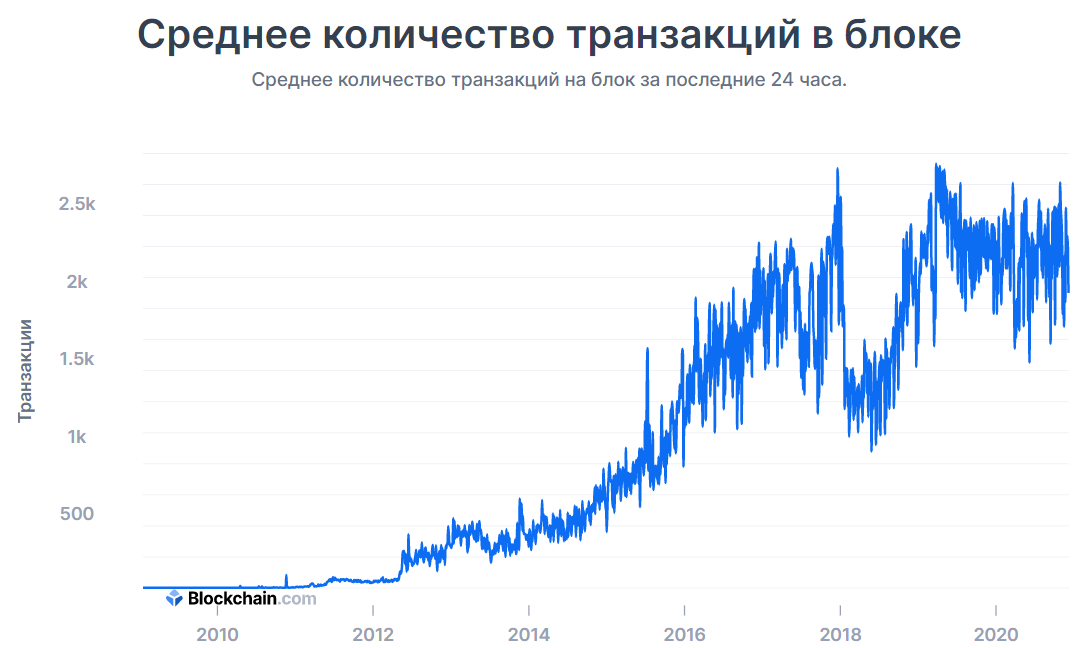
Источник: https://www.blockchain.com/charts/n-transactions-per-block

## Определение сложности алгоритма

Но есть одна проблема. Если мы изменим предыдущий блок, хэши всех последующих блоков можно будет довольно легко пересчитать, чтобы создать другую действительную цепочку блоков.

Как это предотвратить?

Добавим ограничения на наш хэш! Это сделает вычисление хеш-функции гораздо сложнее. 
Давайте добавим ограничение, согласно которому, например, наш хеш должен заканчиваться на «n нулей», где n может быть любым положительным целым числом.
Чем больше количество нулей, тем сложнее вычисления (при этом сами результаты проверяются легко).

Рассмотрим подход на простом примере.

In [108]:
x = 5
y = 0  # Каким будет y нам еще только предстоит вычислить
while calc_hash(f'{x*y}')[-1:] != "0":
    y += 1
print(f'The solution is y = {y}')

The solution is y = 13


In [112]:
import time
for i in range(6):
    start = time.time()
    x = 10
    y = 0  # We don't know what y should be yet...
    match_string = '0' * (i+1)
    while calc_hash(f'{x*y}')[-(i+1):] != match_string:
        y += 1
    stop = time.time()
    duration = stop-start
    print(f'Difficulty = {i}. The solution is y = {y}. Calc time = {duration}')

Difficulty = 0. The solution is y = 46. Calc time = 0.0
Difficulty = 1. The solution is y = 121. Calc time = 0.00099945068359375
Difficulty = 2. The solution is y = 3924. Calc time = 0.01501154899597168
Difficulty = 3. The solution is y = 70558. Calc time = 0.20700812339782715
Difficulty = 4. The solution is y = 235609. Calc time = 0.6764991283416748
Difficulty = 5. The solution is y = 8834272. Calc time = 27.448157787322998


## Как добиться нужной хэш-функции?
Как добиться нужной хэш-функции, чтобы она удовлетоваряла ограничениям (наличие n-нулей в конце)? Просто! Мы добавим фиктивные данные, которые можно изменить. Давайте введем в наш блок новое поле под названием ```nonce```.
Это число, которое мы можем продолжать изменять, пока не получим хеш, удовлетворяющий нашему ограничению. Одноразовый номер, удовлетворяющий ограничению, служит доказательством того, что необходимые расчеты были выполнены.

Особой логики для быстрого определения одноразового номера - нет! Это прост brute force (метод грубой силы). 

Единственное улучшение, которое можете сделать - это использовать микросхемы, специально разработанные для вычисления хэш-функции (с меньшем количеством инструкций ЦП).

In [150]:
block1 = {
    'transactions' : [
        {
            'from' : 'A',
            'to'   : 'B',
            'amt'  : 100 
        },
        {
            'from' : 'B',
            'to'   : 'C',
            'amt'  : 10 
        },
        {
            'from' : 'C',
            'to'   : 'D',
            'amt'  : 10 
        }
    ],
     'previous_hash': calc_hash(block0)
}

In [168]:
calc_hash(block1)

'5dfdbc27887a57e8d43ede68e3d4c4fb'

- Дано: данные block1 (в ожидании добавления к blockchain)
- Текущий хеш от block1 = 5dfdbc27887a57e8d43ede68e3d4c4fb
- Задача: подобрать такой маркер NONCE, добавляя который хэш будет начинаться с нулей 

In [161]:
def calc_nonce(data, difficulty):
    """Вычислим маркер NONCE, добавляя который к строке получим hash с нужными требованиями"""
    start = time.time()
    i = difficulty
    x = repr(data)
    y = 0
    match_string = '0' * (i+1)
    while calc_hash(str(y)+x)[0:(i+1)] != match_string:
        y += 1
    stop = time.time()
    duration = stop-start
    print(f'Difficulty = {i}. Nonce = {y}. Calc time = {duration}')
    return y

In [169]:
%%time
# Вычислить маркер NONCE - сложно!
block_nonce = calc_nonce(data = block1, difficulty = 5)

Difficulty = 5. Nonce = 3102675. Calc time = 13.60014295578003
Wall time: 13.6 s


In [170]:
%%time
# А проверить вычисления - легко!
calc_hash(str(block_nonce) + repr(block1))

Wall time: 0 ns


'000000939cba6ba0d99c4bcf9806a230'

In [171]:
# Нужный маркер подобран - время добавить его в блок
block1.update({'nonce': block_nonce})
print(block1)

{'transactions': [{'from': 'A', 'to': 'B', 'amt': 100}, {'from': 'B', 'to': 'C', 'amt': 10}, {'from': 'C', 'to': 'D', 'amt': 10}], 'previous_hash': 'a2ecad51c9da38a98225a6e65ceaf115', 'nonce': 3102675}


## Как добавить блок к цепи?
Чтобы добавить блок в цепочку, мы сначала должны убедиться, что:
- Данные не были подделаны
- Порядок транзакций сохраняется (поле previous_hash добавляемого блока указывает на хэш последнего блока в нашей цепочке)

## Майнинг
Изначально транзакции хранятся в виде пула неподтвержденных транзакций. 
Процесс помещения неподтвержденных транзакций в блок и вычисления нужных доказательств валидности (nonce + хеш) известен как майнинг блоков.

Как только nonce, удовлетворяющий нашим ограничениям, определен, мы можем сказать, что блок был добыт и его можно поместить в цепочку блоков.

В большинстве криптовалют (включая биткойны) майнеры могут получить некоторую криптовалюту в качестве награды за то, что они потратили свои вычислительные мощности на вычисление доказательств валидности транзакций.

По сути получение вознаграждения за майнинг - это как банковская комиссия за эквайринг. Или облуживание операций.

Т.е. все эти мощности тратятся только на поддержание работы этой транзакционной машины и не добавляют никакой ценности.

## Создадим свой блокчейн
Цель: создать собственный мини-прототип с соблюдением ключевых принципов технологии блокчейн.
Функциональность: 
- обмен информацией (транзакциями) между пользователями
- соблюдение гарантий порядка транзакций
- неизменность опубликованных данных
- доступ через web-интерфейс